In [1]:
#create df for spend by year from 2010 to 2024
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import datetime

In [2]:
#create df for spend by year from 2010 to 2024
years = list(range(2010, 2024))
spend = [11,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5]

df = pd.DataFrame({'Year': years, 'Spend': spend})
df.head()
df.head()

,Year,Spend
0,2010,11.0
1,2011,12.5
2,2012,13.5
3,2013,14.5
4,2014,15.5


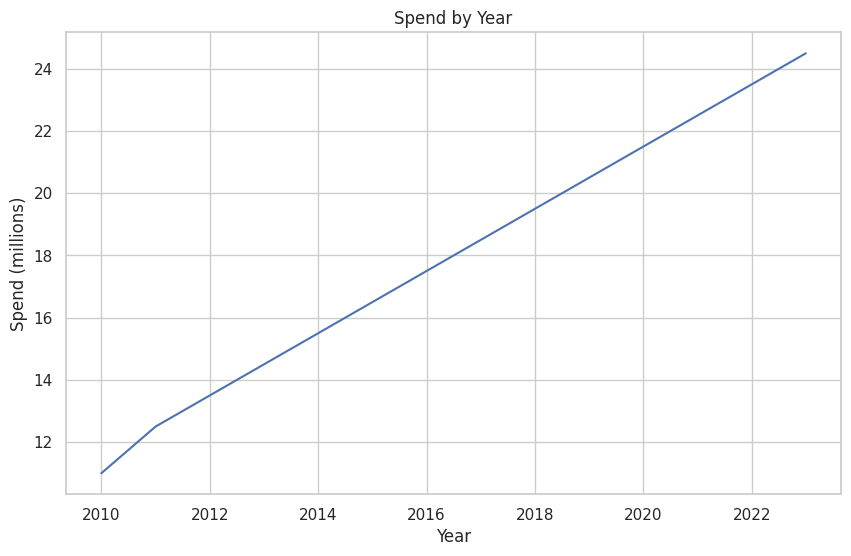

In [3]:
#plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Spend', data=df)
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

In [4]:
years = list(range(2010, 2024))
ts1_spend = [1, 1.3, 2.1, 2.5, 2.7, 3.3, 4.2, 4.5, 5, 5.5, 6.2, 6.1, 6.9, 7.2]
ts2_spend = [10, 9.9, 10.2, 11.2, 11.7, 12.5, 13, 12.5, 13, 13.5, 15, 14.5, 15, 16]
ts3_spend = [5, 5.5, 4,3.5,3,2.5,2,1.5,1,0.5,7,7.5,8,8.5]

df_m = pd.DataFrame({'Year': years, 'TS1 Spend': ts1_spend, 'TS2 Spend': ts2_spend, 'TS3 Spend': ts3_spend})
df_m.head()

,Year,TS1 Spend,TS2 Spend,TS3 Spend
0,2010,1.0,10.0,5.0
1,2011,1.3,9.9,5.5
2,2012,2.1,10.2,4.0
3,2013,2.5,11.2,3.5
4,2014,2.7,11.7,3.0


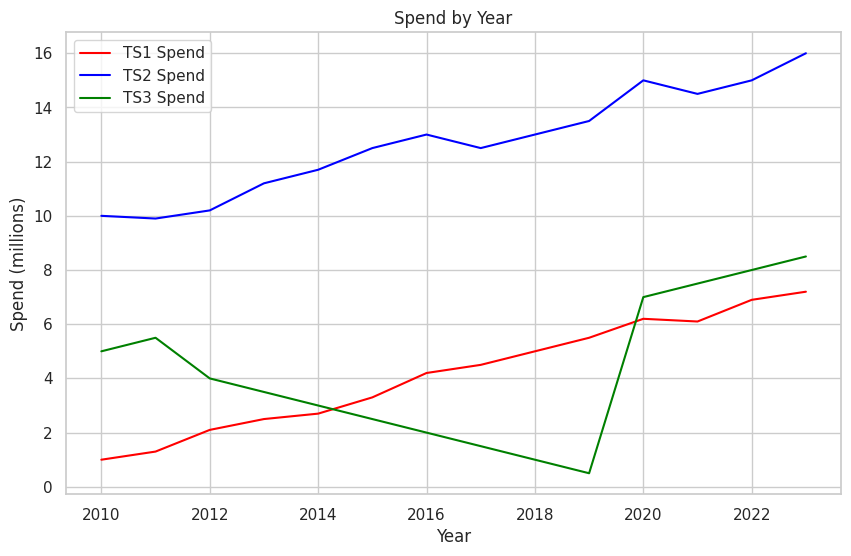

In [5]:
#plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#plot Ts1,2,3 spend
ax = sns.lineplot(x='Year', y='TS1 Spend', data=df_m, color='red', label='TS1 Spend')
ax = sns.lineplot(x='Year', y='TS2 Spend', data=df_m, color='blue', label='TS2 Spend')
ax = sns.lineplot(x='Year', y='TS3 Spend', data=df_m, color='green', label='TS3 Spend')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

In [6]:
#fit a linear regression to Ts2 spend
from sklearn.linear_model import LinearRegression

X1 = df_m['Year'].values.reshape(-1, 1)
y1 = df_m['TS1 Spend'].values.reshape(-1, 1)

reg1 = LinearRegression()
reg1.fit(X1, y1)
print('Slope: ', reg1.coef_[0][0])
print('Intercept: ', reg1.intercept_[0])
print('MAE: ', np.mean(np.abs(reg1.predict(X1) - y1)))

Slope:  0.49120879120879124
Intercept:  -986.343956043956
MAE:  0.14709576138144978


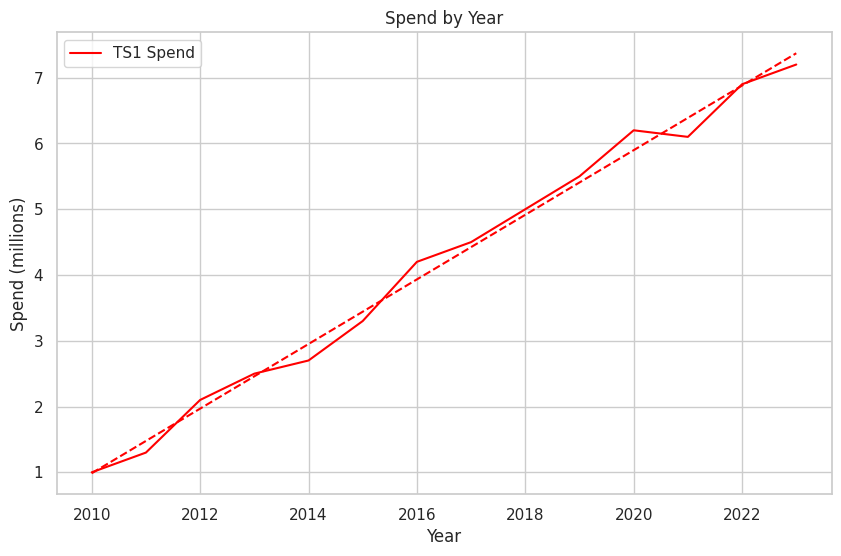

In [7]:
#plot linear regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='TS1 Spend', data=df_m, color='red', label='TS1 Spend')
plt.plot(df_m['Year'], reg1.predict(X1), color='red', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

MAE 0.3288047323179068


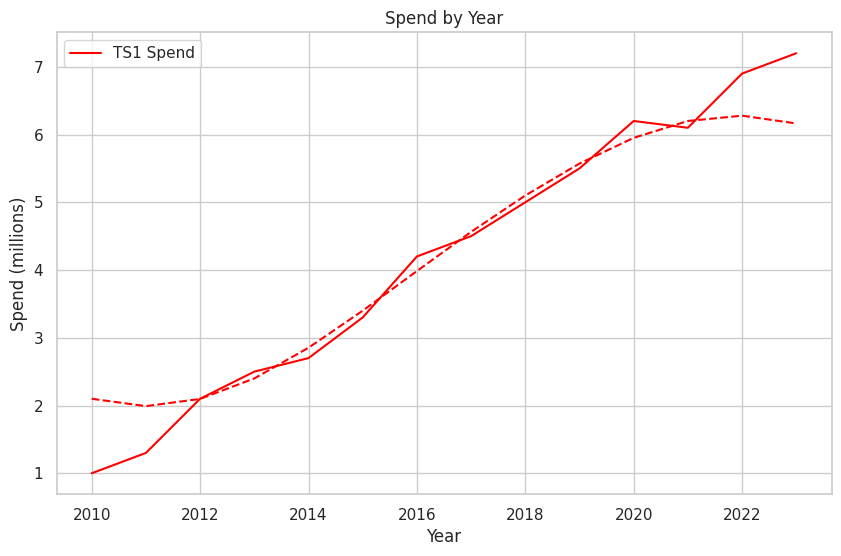

In [8]:
#fit a SVM regression to Ts3 spend
from sklearn.svm import SVR

X1 = df_m['Year'].values.reshape(-1, 1)
y1 = df_m['TS1 Spend'].values

svm_reg1 = SVR()
svm_reg1.fit(X1, y1)

print('MAE', np.mean(np.abs(svm_reg1.predict(X1) - y1)))

#plot Ts3 spend with SVM regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#plot Ts1,2,3 spend
ax = sns.lineplot(x='Year', y='TS1 Spend', data=df_m, color='red', label='TS1 Spend')
plt.plot(X1, svm_reg1.predict(X1),linestyle='--',color='red')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

In [9]:
#Linear regression for TS2
X2 = df_m['Year'].values.reshape(-1, 1)
y2 = df_m['TS2 Spend'].values.reshape(-1, 1)

reg2 = LinearRegression()
reg2.fit(X2, y2)
print('Slope: ', reg2.coef_[0][0])
print('Intercept: ', reg2.intercept_[0])
print('MAE: ', np.mean(np.abs(reg2.predict(X2) - y2)))

Slope:  0.4602197802197802
Intercept:  -915.3189010989012
MAE:  0.35299843014129717


In [10]:
#Linear regression for TS3
X3 = df_m['Year'].values.reshape(-1, 1)
y3 = df_m['TS3 Spend'].values.reshape(-1, 1)

reg3 = LinearRegression()
reg3.fit(X3, y3)
print('Slope: ', reg3.coef_[0][0])
print('Intercept: ', reg3.intercept_[0])
print('MAE', np.mean(np.abs(reg3.predict(X3) - y3)))

Slope:  0.24505494505494502
Intercept:  -489.90329670329663
MAE 2.142857142857147


In [11]:
print('MAE1: ', np.mean(np.abs(reg1.predict(X1) - y1)))
print('MAE2: ', np.mean(np.abs(reg2.predict(X2) - y2)))
print('MAE3: ', np.mean(np.abs(reg3.predict(X3) - y3)))

MAE1:  2.291119084996634
MAE2:  0.35299843014129717
MAE3:  2.142857142857147


In [12]:
#fit a SVM regression to Ts3 spend
from sklearn.svm import SVR

X3 = df_m['Year'].values.reshape(-1, 1)
y3 = df_m['TS3 Spend'].values

svm_reg3 = SVR()
svm_reg3.fit(X3, y3)

print('MAE', np.mean(np.abs(svm_reg3.predict(X3) - y3)))

MAE 0.8844254418713654


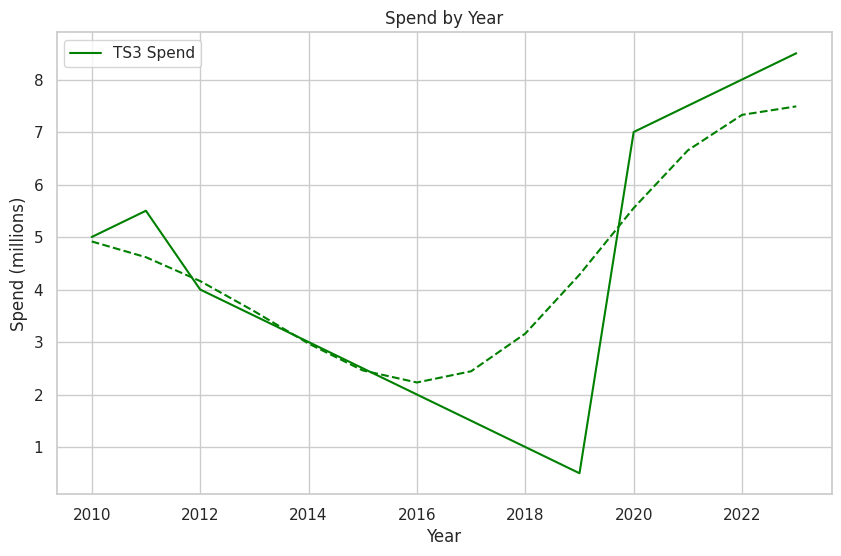

In [13]:
#plot Ts3 spend with SVM regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#plot Ts1,2,3 spend
ax = sns.lineplot(x='Year', y='TS3 Spend', data=df_m, color='green', label='TS3 Spend')
plt.plot(X3, svm_reg3.predict(X3),linestyle='--',color='green')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()


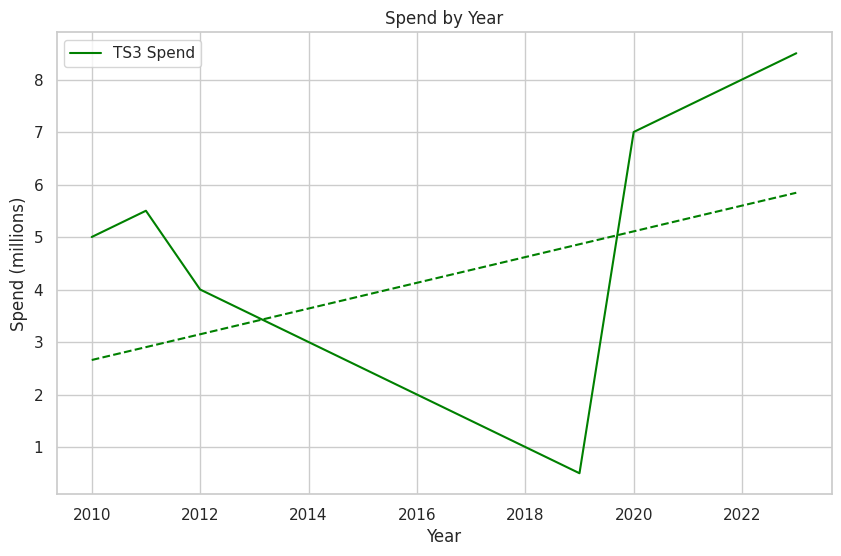

In [14]:
#plot Ts3 spend with linear regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='TS3 Spend', data=df_m, color='green', label='TS3 Spend')
plt.plot(df_m['Year'], reg3.predict(X3), linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

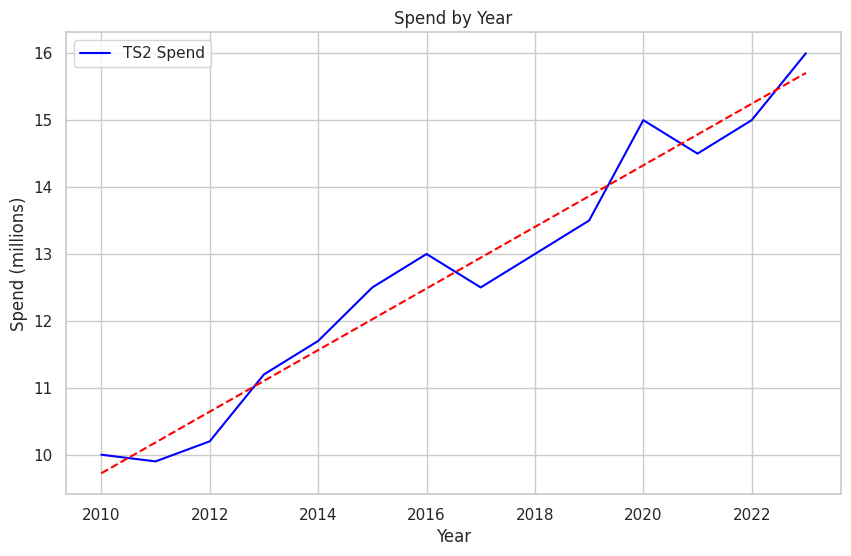

In [15]:
#plot Ts2 spend and the linear regression
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='TS2 Spend', data=df_m, color='blue', label='TS2 Spend')
plt.plot(df_m['Year'], reg2.predict(X2), color='red', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

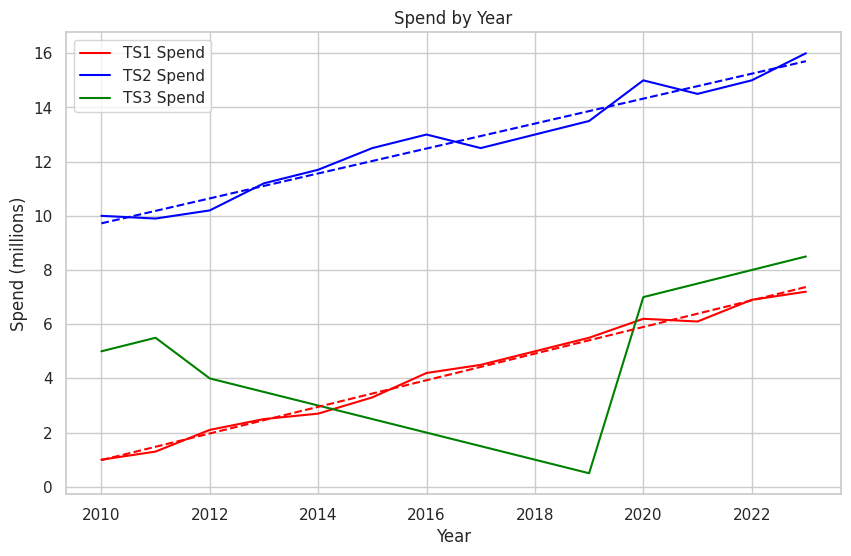

In [16]:
#plot Ts1, 2, 3 spend and the linear regression for each
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='TS1 Spend', data=df_m, color='red', label='TS1 Spend')
ax = sns.lineplot(x='Year', y='TS2 Spend', data=df_m, color='blue', label='TS2 Spend')
ax = sns.lineplot(x='Year', y='TS3 Spend', data=df_m, color='green', label='TS3 Spend')
plt.plot(df_m['Year'], reg1.predict(X1), color='red', linestyle='--', label='Linear Regression TS1')
plt.plot(df_m['Year'], reg2.predict(X2), color='blue', linestyle='--', label='Linear Regression TS2')
#plt.plot(df_m['Year'], reg3.predict(X3), color='green', linestyle='--', label='Linear Regression TS3')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()


In [17]:
#uncomment pip install if you need pycaret
#%pip install pycaret

In [18]:
from pycaret.regression import *
from tqdm import tqdm

In [19]:
# Create a list of years from 2010 to 2023
years = list(range(2010, 2024))

# Create a list of months
months = list(range(1, 13))

# Initialize base spend amounts for TS1, TS2, and TS3
base_spend_TS1 = 5.1
base_spend_TS2 = 7.2
base_spend_TS3 = 2.9

# Create an empty DataFrame
df_m = pd.DataFrame()

# Populate the DataFrame
for year in years:
    for month in months:
        spend_TS1 = base_spend_TS1 * (1.04 ** (year - 2010))
        spend_TS2 = base_spend_TS2 * (1.02 ** (year - 2010))
        spend_TS3 = base_spend_TS3 * (1.05 ** (year - 2010))
        df_m = df_m.append({'Year': year, 'Month': month, 'TS': 'TS1', 'Spend': spend_TS1}, ignore_index=True)
        df_m = df_m.append({'Year': year, 'Month': month, 'TS': 'TS2', 'Spend': spend_TS2}, ignore_index=True)
        df_m = df_m.append({'Year': year, 'Month': month, 'TS': 'TS3', 'Spend': spend_TS3}, ignore_index=True)

# Set the column names
df_m.columns = ['Year', 'Month', 'TS', 'Spend']
#randomize spend by adding noise
df_m['Spend'] = df_m['Spend'] + np.random.normal(0, 0.7, df_m.shape[0])

# Convert Year and Month to integer type
df_m['Year'] = df_m['Year'].astype(int)
df_m['Month'] = df_m['Month'].astype(int)

data = df_m
data.sort_values(by=['Year'], inplace=True)
data.head()

,Year,Month,TS,Spend
0,2010,1,TS1,6.188692
20,2010,7,TS3,2.138990
21,2010,8,TS1,5.457636
22,2010,8,TS2,6.391521
23,2010,8,TS3,2.342985


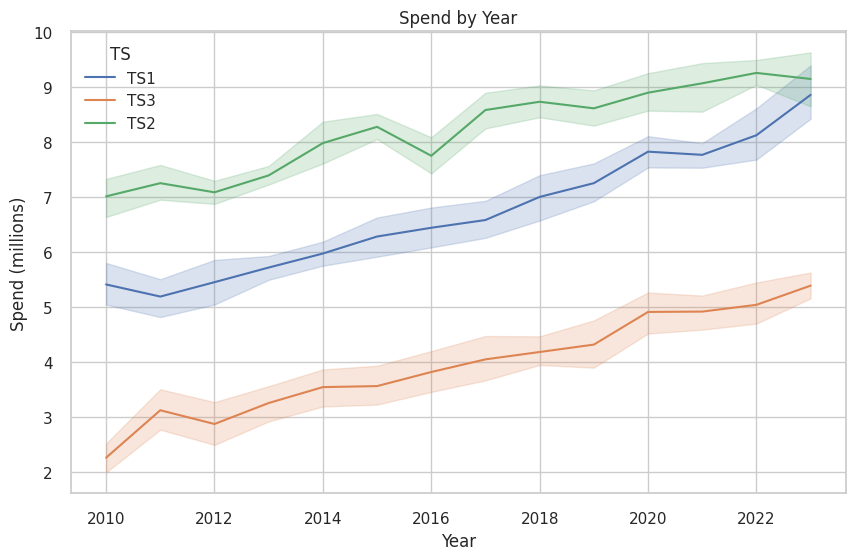

In [20]:
#plot spend by TS
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Spend', data=data, hue='TS')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

In [21]:
all_ts = data['TS'].unique()

all_results = []
final_model = {}

for i in tqdm(all_ts):
#for i in tqdm(all_ts):
    df_subset = data[data['TS'] == i]

    # initialize setup from pycaret.regression
    s = setup(df_subset, target = 'Spend', train_size = 0.80,
              data_split_shuffle = False,
              fold_strategy = 'timeseries', fold = 3,
              numeric_features= ['Year'],
              categorical_features = ['Month'],
              ignore_features = ['TS'],
              use_gpu=True,
               verbose = False)

    # compare all models and select best one based on MAE

    best_model = compare_models(sort = 'MAE', verbose=True)


    # capture the compare result grid and store best model in list
    p = pull().iloc[0:1]
    p['time_series'] = str(i)
    all_results.append(p)

    # finalize model i.e. fit on entire data including test set
    f = finalize_model(best_model)

    # attach final model to a dictionary
    final_model[i] = f

    # save transformation pipeline and model as pickle file
    save_model(f, model_name='/content/drive/MyDrive/Colab Notebooks/Models/' + str(i), verbose=False)

  0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.5662,0.5217,0.7190,-0.3374,0.0954,0.0841,0.0733
lar,Least Angle Regression,0.5662,0.5217,0.7190,-0.3374,0.0954,0.0841,0.0667
ridge,Ridge Regression,0.5671,0.5090,0.7109,-0.2995,0.0941,0.0842,0.0667
omp,Orthogonal Matching Pursuit,0.5970,0.5297,0.7239,-0.3741,0.0960,0.0892,0.0667
br,Bayesian Ridge,0.6009,0.5324,0.7267,-0.3716,0.0961,0.0893,0.0667
knn,K Neighbors Regressor,0.6129,0.5661,0.7522,-0.4038,0.0992,0.0916,0.0933
rf,Random Forest Regressor,0.6972,0.7943,0.8853,-0.9681,0.1176,0.1016,0.2533
ada,AdaBoost Regressor,0.7275,0.8227,0.8994,-1.0097,0.1187,0.1052,0.1333
lightgbm,Light Gradient Boosting Machine,0.7456,0.8294,0.9033,-0.9802,0.1179,0.1067,0.1200
gbr,Gradient Boosting Regressor,0.7666,0.9483,0.9655,-1.3871,0.1302,0.1131,0.1300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:15<00:30, 15.02s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.5333,0.4038,0.6350,0.1643,0.1338,0.1483,0.0700
ridge,Ridge Regression,0.5634,0.4566,0.6753,0.0429,0.1423,0.1601,0.0667
omp,Orthogonal Matching Pursuit,0.5686,0.4807,0.6929,-0.0069,0.1460,0.1627,0.0667
lr,Linear Regression,0.5781,0.4851,0.6952,-0.0217,0.1459,0.1644,0.0767
lar,Least Angle Regression,0.5781,0.4851,0.6952,-0.0217,0.1459,0.1644,0.0700
knn,K Neighbors Regressor,0.6289,0.5732,0.7570,-0.1918,0.1544,0.1598,0.0933
ada,AdaBoost Regressor,0.6694,0.6877,0.8256,-0.4136,0.1681,0.1661,0.0933
rf,Random Forest Regressor,0.6727,0.6977,0.8342,-0.4612,0.1741,0.1707,0.2467
lightgbm,Light Gradient Boosting Machine,0.7044,0.7522,0.8652,-0.5685,0.1770,0.1734,0.1133
gbr,Gradient Boosting Regressor,0.7074,0.7553,0.8651,-0.6015,0.1834,0.1826,0.1267


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:27<00:13, 13.77s/it]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.5745,0.5285,0.7129,-0.3125,0.0780,0.0700,0.0667
br,Bayesian Ridge,0.5764,0.5631,0.7288,-0.3960,0.0798,0.0696,0.0667
lr,Linear Regression,0.5792,0.5340,0.7164,-0.3257,0.0784,0.0707,0.0700
lar,Least Angle Regression,0.5792,0.5340,0.7164,-0.3257,0.0784,0.0707,0.0667
omp,Orthogonal Matching Pursuit,0.6146,0.6173,0.7635,-0.5269,0.0837,0.0746,0.0633
rf,Random Forest Regressor,0.6155,0.6303,0.7778,-0.5825,0.0852,0.0736,0.2500
knn,K Neighbors Regressor,0.6232,0.6330,0.7819,-0.5821,0.0852,0.0746,0.0933
ada,AdaBoost Regressor,0.6316,0.6647,0.7979,-0.6672,0.0872,0.0756,0.1467
et,Extra Trees Regressor,0.6427,0.7077,0.8266,-0.7673,0.0909,0.0772,0.2000
gbr,Gradient Boosting Regressor,0.6445,0.6965,0.8185,-0.7412,0.0899,0.0772,0.1267


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:40<00:00, 13.61s/it]


In [22]:
concat_results = pd.concat(all_results,axis=0)
concat_results.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
lr,Linear Regression,0.5662,0.5217,0.7190,-0.3374,0.0954,0.0841,0.0733,TS1
br,Bayesian Ridge,0.5333,0.4038,0.6350,0.1643,0.1338,0.1483,0.0700,TS3
ridge,Ridge Regression,0.5745,0.5285,0.7129,-0.3125,0.0780,0.0700,0.0667,TS2


In [23]:
# create a date range from 2010 to 2029
all_dates = pd.date_range(start='2010-01-01', end = '2029-01-01', freq = 'MS')
# create empty dataframe
score_df = pd.DataFrame()
# add columns to dataset
score_df['date'] = all_dates
score_df['Month'] = [i.month for i in score_df['date']]
score_df['Year'] = [i.year for i in score_df['date']]
#drop date column
score_df.drop('date', axis=1, inplace=True)
score_df.head()

,Month,Year
0,1,2010
1,2,2010
2,3,2010
3,4,2010
4,5,2010


In [24]:
from pycaret.regression import load_model, predict_model
all_score_df = []
for i in tqdm(data['TS'].unique()):
    l = load_model('/content/drive/MyDrive/Colab Notebooks/Models/' + str(i), verbose=True)
    p = predict_model(l, data=score_df)
    p['TS'] = i
    all_score_df.append(p)
concat_df = pd.concat(all_score_df, axis=0)

  0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Loaded


 33%|███▎      | 1/3 [00:00<00:00,  5.31it/s]

Transformation Pipeline and Model Successfully Loaded


 67%|██████▋   | 2/3 [00:00<00:00,  5.30it/s]

Transformation Pipeline and Model Successfully Loaded


100%|██████████| 3/3 [00:00<00:00,  5.28it/s]


In [25]:
final_df = pd.merge(concat_df, data, how = 'left', left_on=['Year', 'TS'], right_on = ['Year', 'TS'])
final_df.head()

,Month_x,Year,prediction_label,TS,Month_y,Spend
0,1,2010,4.778287,TS1,1.0,6.188692
1,1,2010,4.778287,TS1,8.0,5.457636
2,1,2010,4.778287,TS1,9.0,5.536745
3,1,2010,4.778287,TS1,10.0,6.408206
4,1,2010,4.778287,TS1,11.0,4.772879


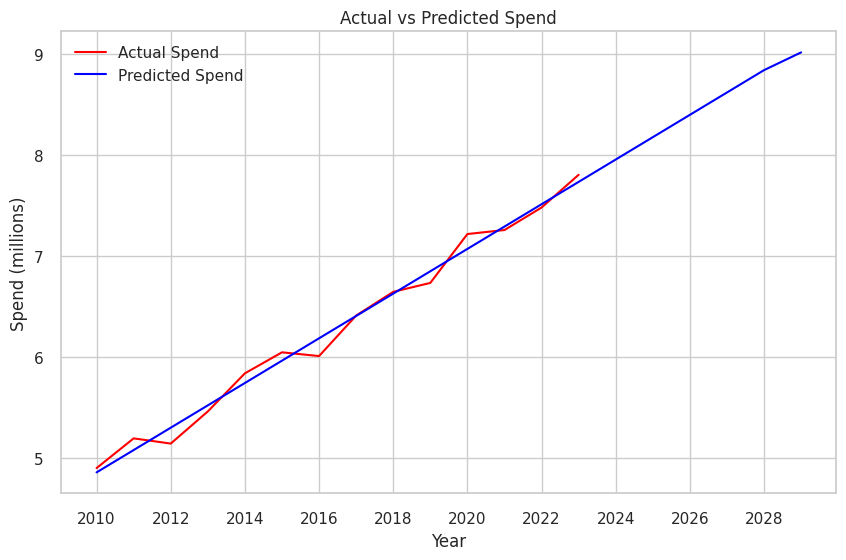

In [26]:
#plot actual vs predicted spend for each TS
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
#plot Ts1,2,3 spend
ax = sns.lineplot(x='Year', y='Spend', data=final_df, color='red', label='Actual Spend',ci=None)
ax = sns.lineplot(x='Year', y='prediction_label', data=final_df, color='blue', label='Predicted Spend',ci=None)
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Actual vs Predicted Spend')
plt.xticks(np.arange(min(final_df['Year']), max(final_df['Year'])+1, 2.0).astype(int))  # Set xticks to be integers
plt.show()

In [31]:
#create year_month column
final_df['Year_Month'] = final_df['Year'].astype(str) + '-' + final_df['Month_x'].astype(str)


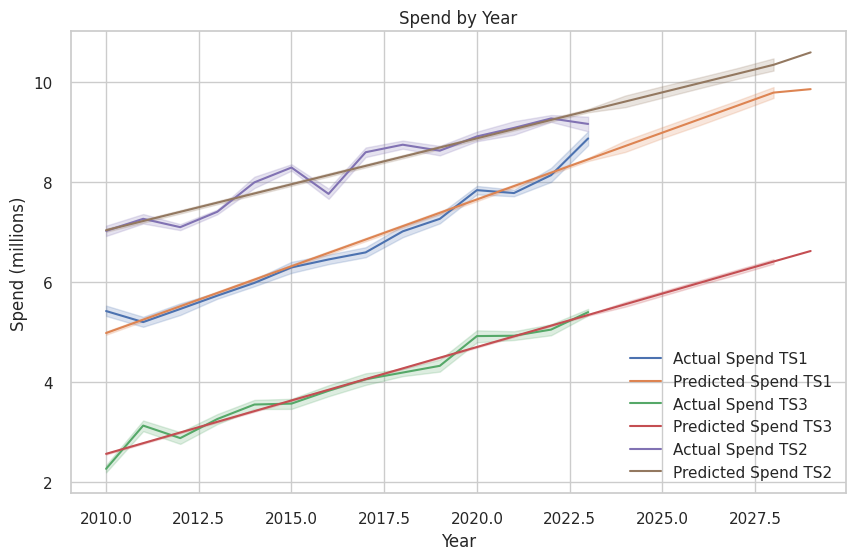

In [33]:
#plot Ts1, 2, 3 spend and the prediction for each
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for i in data['TS'].unique():
    df_subset = final_df[final_df['TS'] == i]
    ax = sns.lineplot(x='Year', y='Spend', data=df_subset, label='Actual Spend ' + str(i))
    ax = sns.lineplot(x='Year', y='prediction_label', data=df_subset, label='Predicted Spend ' + str(i))
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Spend by Year')
plt.show()

In [35]:
#restrict df to years before 2024 calculate MAE for actual vs predicted

final_df_before_2024 = final_df[final_df['Year'] < 2024]
mae = np.mean(np.abs(final_df_before_2024['Spend'] - final_df_before_2024['prediction_label']))
print('MAE:', mae)


MAE: 0.5294171297864654


In [36]:
#split data into 80/20 train test split
from sklearn.model_selection import train_test_split

X = data[['Year']]
y = data['Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
#fit linear regression on train data
reg = LinearRegression()
reg.fit(X_train, y_train)

#predict on test data
y_pred = reg.predict(X_test)

#calculate MAE
mae = np.mean(np.abs(y_pred - y_test))
print('MAE: ', mae)


MAE:  1.793739019490758


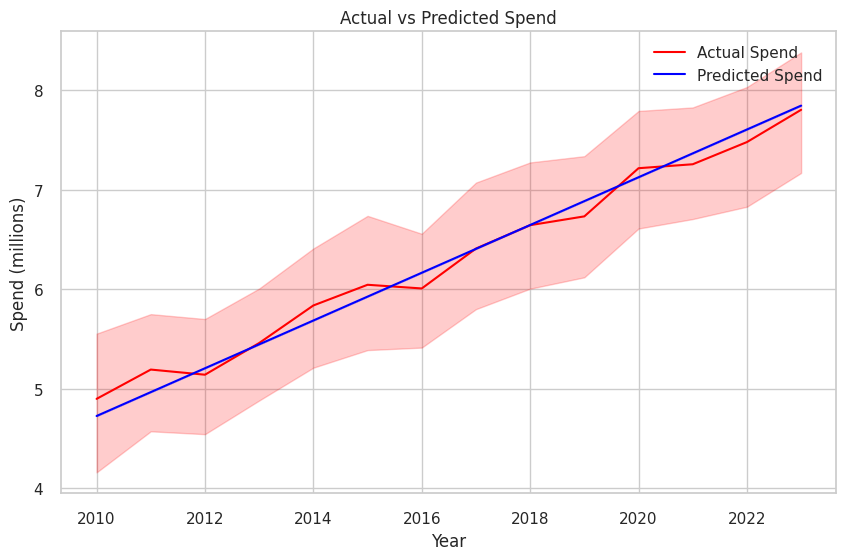

In [38]:
#plot actual vs predicted spend
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Year', y='Spend', data=data, color='red', label='Actual Spend')
ax = sns.lineplot(x='Year', y=reg.predict(X), data=data, color='blue', label='Predicted Spend')
plt.xlabel('Year')
plt.ylabel('Spend (millions)')
plt.title('Actual vs Predicted Spend')
plt.show()
